In [88]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import pandas as pd
import seaborn as sns

import mne
from scipy.io import loadmat, savemat
from scipy.stats import ttest_rel, ttest_1samp, ttest_ind, kstest, wilcoxon
from statannotations.Annotator import Annotator
from statsmodels.stats.multitest import fdrcorrection

import glob
import os

import pickle
import sys

sys.path.append('../utils')
from ERP_utils import *
from update_sub_lists import *


### Loading data
(in the future use preloaded versions)

In [89]:

#load subjects
good_listen_subjects, good_motor_subjects, good_error_subjects, musicians, nonmusicians = load_subject_lists_LME()
subjects_to_process = good_listen_subjects
#subjects_to_process = ['05', '06', '09', '12']

task = 'listen'
sub_ave = False

#which timepoints to be included in exported data
erp_begin_crop = -0.2
erp_end_crop= 0.5

erp_begin = -0.5
erp_end = 0.5


erp_window = '_n05to05' #which of the saved datasets to use
fs = 128



In [90]:
if task == 'listen' or task == 'motor':
    epochs_dir = f'/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_{task}/{task}_epochs_data{erp_window}'
elif task == 'error':
    epochs_dir = f'/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_error/error_epochs_data{erp_window}'

#create time vector
erp_times_orig = create_erp_times(erp_begin, erp_end, fs)
erp_times_crop = create_erp_times(erp_begin_crop, erp_end_crop, fs)


#load channels
ch_names_64, _ = load_channels()
#erp_times = load_erp_times() #this only works for the erps for -0.2 to 0.5 secs

#load standard mne info (used for channel positions)
with open('../utils/epochs_info.pkl', 'rb') as file:
    epochs_info = pickle.load(file)

In [91]:
if task == 'listen' or task == 'motor':
    epochs_df = load_epochs_bysubject(subjects_to_process, task=task, epochs_dir = epochs_dir, sub_ave = sub_ave)

elif task == 'error':
    epochs_df = load_error_epochs_bysubject(subjects_to_process, epoch_type = 'all', epochs_dir = epochs_dir, sub_ave = sub_ave)


Processing subject:  01
Reading /Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_listen/listen_epochs_data_n05to05/listen_epochs_pre_01.fif ...
    Found the data of interest:
        t =    -500.00 ...     500.00 ms
        0 CTF compensation matrices available


Not setting metadata
328 matching events found
No baseline correction applied
0 projection items activated
Reading /Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_listen/listen_epochs_data_n05to05/listen_epochs_post_01.fif ...
    Found the data of interest:
        t =    -500.00 ...     500.00 ms
        0 CTF compensation matrices available
Not setting metadata
328 matching events found
No baseline correction applied
0 projection items activated
Processing subject:  02
Reading /Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_listen/listen_epochs_data_n05to05/listen_epochs_pre_02.fif ...
    Found the data of interest:
        t =    -500.00 ...     500.00 ms
        0 CTF compensation matrices available


/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/pipelines_LM/../utils/ERP_utils.py:411: RuntimeWarning: This filename (/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_listen/listen_epochs_data_n05to05/listen_epochs_pre_01.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs_sub = mne.read_epochs(file_epochs_pre)
/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/pipelines_LM/../utils/ERP_utils.py:411: RuntimeWarning: This filename (/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_listen/listen_epochs_data_n05to05/listen_epochs_post_01.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs_sub = mne.read_epochs(file_epochs_pre)
/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/pipelines_LM/../utils/ERP_utils.py:411: RuntimeWarning: This filename (/Users/cindyzhang/Documents/M

Not setting metadata
328 matching events found
No baseline correction applied
0 projection items activated
Reading /Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_listen/listen_epochs_data_n05to05/listen_epochs_post_02.fif ...
    Found the data of interest:
        t =    -500.00 ...     500.00 ms
        0 CTF compensation matrices available
Not setting metadata
328 matching events found
No baseline correction applied
0 projection items activated
Processing subject:  03
Reading /Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_listen/listen_epochs_data_n05to05/listen_epochs_pre_03.fif ...
    Found the data of interest:
        t =    -500.00 ...     500.00 ms
        0 CTF compensation matrices available
Not setting metadata
328 matching events found
No baseline correction applied
0 projection items activated
Reading /Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_listen/listen_epochs_data_n05to05/listen_epochs_post_03.fif ...
    Found 

/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/pipelines_LM/../utils/ERP_utils.py:411: RuntimeWarning: This filename (/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_listen/listen_epochs_data_n05to05/listen_epochs_post_02.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs_sub = mne.read_epochs(file_epochs_pre)
/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/pipelines_LM/../utils/ERP_utils.py:411: RuntimeWarning: This filename (/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_listen/listen_epochs_data_n05to05/listen_epochs_pre_03.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs_sub = mne.read_epochs(file_epochs_pre)
/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/pipelines_LM/../utils/ERP_utils.py:411: RuntimeWarning: This filename (/Users/cindyzhang/Documents/M

    Found the data of interest:
        t =    -500.00 ...     500.00 ms
        0 CTF compensation matrices available
Not setting metadata
328 matching events found
No baseline correction applied
0 projection items activated
Reading /Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_listen/listen_epochs_data_n05to05/listen_epochs_post_06.fif ...
    Found the data of interest:
        t =    -500.00 ...     500.00 ms
        0 CTF compensation matrices available
Not setting metadata
328 matching events found
No baseline correction applied
0 projection items activated
Processing subject:  07
Reading /Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_listen/listen_epochs_data_n05to05/listen_epochs_pre_07.fif ...
    Found the data of interest:
        t =    -500.00 ...     500.00 ms
        0 CTF compensation matrices available
Not setting metadata
328 matching events found
No baseline correction applied
0 projection items activated
Reading /Users/cindyzhang/D

/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/pipelines_LM/../utils/ERP_utils.py:411: RuntimeWarning: This filename (/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_listen/listen_epochs_data_n05to05/listen_epochs_post_06.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs_sub = mne.read_epochs(file_epochs_pre)
/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/pipelines_LM/../utils/ERP_utils.py:411: RuntimeWarning: This filename (/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_listen/listen_epochs_data_n05to05/listen_epochs_pre_07.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs_sub = mne.read_epochs(file_epochs_pre)
/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/pipelines_LM/../utils/ERP_utils.py:411: RuntimeWarning: This filename (/Users/cindyzhang/Documents/M

Not setting metadata
328 matching events found
No baseline correction applied
0 projection items activated
Processing subject:  10
Reading /Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_listen/listen_epochs_data_n05to05/listen_epochs_pre_10.fif ...
    Found the data of interest:
        t =    -500.00 ...     500.00 ms
        0 CTF compensation matrices available
Not setting metadata
328 matching events found
No baseline correction applied
0 projection items activated
Reading /Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_listen/listen_epochs_data_n05to05/listen_epochs_post_10.fif ...
    Found the data of interest:
        t =    -500.00 ...     500.00 ms
        0 CTF compensation matrices available
Not setting metadata
322 matching events found
No baseline correction applied
0 projection items activated
Processing subject:  11
Reading /Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_listen/listen_epochs_data_n05to05/listen_epochs_pr

/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/pipelines_LM/../utils/ERP_utils.py:411: RuntimeWarning: This filename (/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_listen/listen_epochs_data_n05to05/listen_epochs_pre_10.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs_sub = mne.read_epochs(file_epochs_pre)
/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/pipelines_LM/../utils/ERP_utils.py:411: RuntimeWarning: This filename (/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_listen/listen_epochs_data_n05to05/listen_epochs_post_10.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs_sub = mne.read_epochs(file_epochs_pre)
/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/pipelines_LM/../utils/ERP_utils.py:411: RuntimeWarning: This filename (/Users/cindyzhang/Documents/M

Not setting metadata
328 matching events found
No baseline correction applied
0 projection items activated
Processing subject:  14
Reading /Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_listen/listen_epochs_data_n05to05/listen_epochs_pre_14.fif ...
    Found the data of interest:
        t =    -500.00 ...     500.00 ms
        0 CTF compensation matrices available
Not setting metadata
328 matching events found
No baseline correction applied
0 projection items activated
Reading /Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_listen/listen_epochs_data_n05to05/listen_epochs_post_14.fif ...
    Found the data of interest:
        t =    -500.00 ...     500.00 ms
        0 CTF compensation matrices available
Not setting metadata
328 matching events found
No baseline correction applied
0 projection items activated
Processing subject:  15
Reading /Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_listen/listen_epochs_data_n05to05/listen_epochs_pr

/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/pipelines_LM/../utils/ERP_utils.py:411: RuntimeWarning: This filename (/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_listen/listen_epochs_data_n05to05/listen_epochs_pre_14.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs_sub = mne.read_epochs(file_epochs_pre)
/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/pipelines_LM/../utils/ERP_utils.py:411: RuntimeWarning: This filename (/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_listen/listen_epochs_data_n05to05/listen_epochs_post_14.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs_sub = mne.read_epochs(file_epochs_pre)
/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/pipelines_LM/../utils/ERP_utils.py:411: RuntimeWarning: This filename (/Users/cindyzhang/Documents/M

328 matching events found
No baseline correction applied
0 projection items activated
Reading /Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_listen/listen_epochs_data_n05to05/listen_epochs_post_17.fif ...
    Found the data of interest:
        t =    -500.00 ...     500.00 ms
        0 CTF compensation matrices available
Not setting metadata
328 matching events found
No baseline correction applied
0 projection items activated
Processing subject:  18
Reading /Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_listen/listen_epochs_data_n05to05/listen_epochs_pre_18.fif ...
    Found the data of interest:
        t =    -500.00 ...     500.00 ms
        0 CTF compensation matrices available
Not setting metadata
328 matching events found
No baseline correction applied
0 projection items activated
Reading /Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_listen/listen_epochs_data_n05to05/listen_epochs_post_18.fif ...
    Found the data of interest:

/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/pipelines_LM/../utils/ERP_utils.py:411: RuntimeWarning: This filename (/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_listen/listen_epochs_data_n05to05/listen_epochs_post_17.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs_sub = mne.read_epochs(file_epochs_pre)
/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/pipelines_LM/../utils/ERP_utils.py:411: RuntimeWarning: This filename (/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_listen/listen_epochs_data_n05to05/listen_epochs_pre_18.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs_sub = mne.read_epochs(file_epochs_pre)
/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/pipelines_LM/../utils/ERP_utils.py:411: RuntimeWarning: This filename (/Users/cindyzhang/Documents/M

Not setting metadata
328 matching events found
No baseline correction applied
0 projection items activated
Reading /Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_listen/listen_epochs_data_n05to05/listen_epochs_post_21.fif ...
    Found the data of interest:
        t =    -500.00 ...     500.00 ms
        0 CTF compensation matrices available
Not setting metadata
328 matching events found
No baseline correction applied
0 projection items activated


/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/pipelines_LM/../utils/ERP_utils.py:411: RuntimeWarning: This filename (/Users/cindyzhang/Documents/M2/Audiomotor_Piano/AM-EEG/analysis_listen/listen_epochs_data_n05to05/listen_epochs_post_21.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs_sub = mne.read_epochs(file_epochs_pre)


In [92]:

tmin_idx = time_index_custom([erp_begin_crop], erp_times_orig)[0]
#tmax_idx = time_index([erp_end])[0]

if sub_ave:
    epochs_df['epochs'] = epochs_df['epochs'].apply(lambda x: x[:, tmin_idx:])
else:
    epochs_df['epochs'] = epochs_df['epochs'].apply(lambda x: x[:, :,tmin_idx:])

shape of epochs: (328, 64, 91)


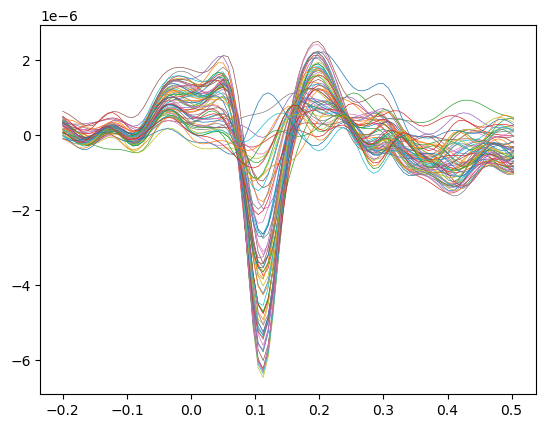

In [93]:
#sanity check 

#only works if sub_ave = False

print('shape of epochs:',epochs_df.iloc[0]['epochs'].shape)

if sub_ave:
    plt.plot(erp_times_crop, np.mean(epochs_df['epochs']).T, linewidth = 0.5);

else: #if not averaged, just 
    plt.plot(erp_times_crop, np.mean(epochs_df.iloc[0]['epochs'], axis = 0).T, linewidth = 0.5);

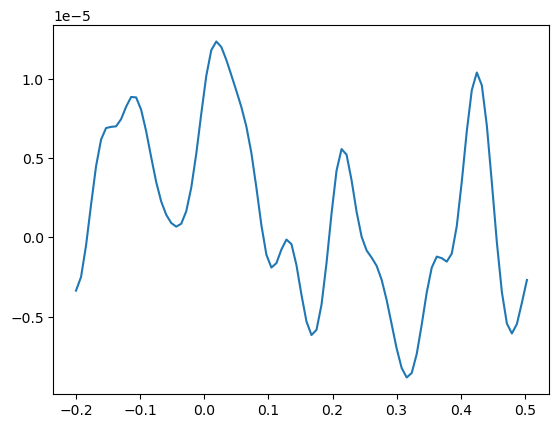

In [296]:
plt.plot(erp_times_crop,epochs_df.iloc[0]['epochs'][2,47,:])

### Load midi data

In [229]:
midi_values = loadmat('../stimuli/midi_values_mirrored_noteon.mat')['midi_values'][0]

In [265]:
c_indices = np.where(midi_values == 60)[0]
d_indices = np.where(midi_values == 62)[0]

### Compute correlations

In [259]:


def corr_erp(ep_df, ch, subset=None):
    """
    ep_df: dataframe of epochs
    ch: index of channel of interest
    subset: a list of indices

    returns a list, each element is the average correlation for one subject
    """
    ave_corr = []
    for sub in range(ep_df.shape[0]):
        # Select the epochs for the current subject
        epochs_sub = ep_df.iloc[sub]['epochs']
        if subset is not None:  # take only certain trials
            try:
                epochs_sub = ep_df.iloc[sub]['epochs'][subset, :, :]
            except IndexError: 
                print('ran out of indices, taking the available indices')
                subset_cropped = subset[subset<epochs_sub.shape[0]]
                epochs_sub  = ep_df.iloc[sub]['epochs'][subset_cropped, :, :]

            

        # Select the channel of interest
        epochs_sub_ch = epochs_sub[:, ch, :]
        
        # Calculate the correlation matrix
        ep_cr = np.corrcoef(epochs_sub_ch)

        # Calculate the average correlation from the upper triangle of the matrix
        num_trials = ep_cr.shape[0]
        upper_triangle_indices = np.triu_indices(num_trials, k=1)

        average_correlation = ep_cr[upper_triangle_indices].mean()
        ave_corr.append(average_correlation)
        
    return ep_cr, ave_corr


In [281]:
epochs_df_pre = epochs_df.query("period =='pre' and musician ==0 ")
epochs_df_post = epochs_df.query("period =='post' and musician ==0")

In [287]:
ch = 48
corr_pre, ave_corr_pre = corr_erp(epochs_df_pre, ch, subset = None)
corr_post, ave_corr_post = corr_erp(epochs_df_post, ch, subset = None)

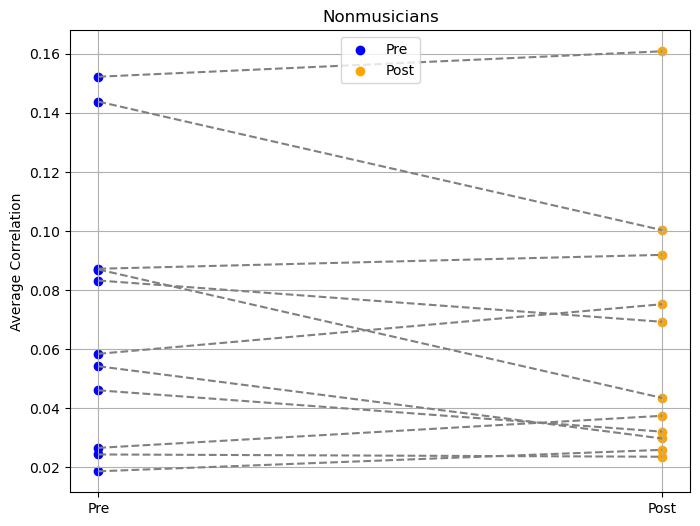

In [288]:

# Create scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(np.zeros_like(ave_corr_pre), ave_corr_pre, label='Pre', color='blue')
plt.scatter(np.ones_like(ave_corr_post), ave_corr_post, label='Post', color='orange')

# Connect each subject's points with a line
for i in range(len(ave_corr_pre)):
    plt.plot([0, 1], [ave_corr_pre[i], ave_corr_post[i]], color='gray', linestyle='--')

# Add labels and legend
plt.xticks([0, 1], ['Pre', 'Post'])
plt.ylabel('Average Correlation')
plt.title('Nonmusicians')
plt.legend()
plt.grid()
plt.show()


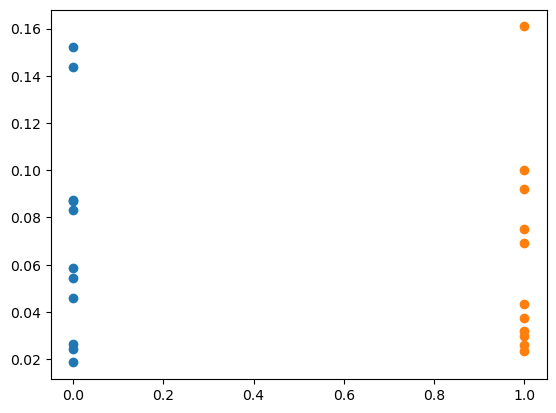

In [289]:
plt.scatter(np.zeros_like(ave_corr_pre), ave_corr_pre)
plt.scatter(np.ones_like(ave_corr_post), ave_corr_post)

Average correlation between trials: 0.09124306413882859


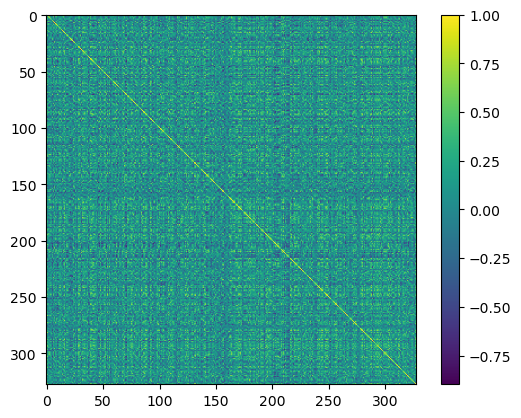

In [290]:

plt.imshow(corr_pre)
plt.colorbar()

num_trials = ep_cr.shape[0]
upper_triangle_indices = np.triu_indices(num_trials, k=1)

# Calculate the mean of the upper triangle (off-diagonal correlations)
average_correlation = ep_cr[upper_triangle_indices].mean()
print("Average correlation between trials:", average_correlation)